# Used Cars project (Kaggle dataset)

TODO:
- put cleaning and preprocessing code in a function to easily handle new data


In [51]:
# Display plots inline in the notebook
%matplotlib inline

# Import core libraries
import pandas as pd
import numpy as np
#matplotlib.use('Agg')  # Use 'Agg' backend for non-GUI environments
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor

import joblib  # Use joblib to save and load the model
import warnings
warnings.filterwarnings('ignore')

# Load the data
data = pd.read_csv('used_cars.csv')

print("First 5 records of the dataset:")
print(data.head())



First 5 records of the dataset:
      brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black

### Get basic dataset info

In [33]:
# Get basic info
print(data.info())

print("\nMissing values in each column:")
print(data.isnull().sum())

# Check for duplicates
#print(data.duplicated().sum())

print("\nStatistical summary of numerical features:")
print(data.describe())

# find unique fuel_types
print("\nUnique fuel types:")
print(data['fuel_type'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB
None

Missing values in each column:
brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title    

### Data cleaning and Preprocessing


Statistical summary of numerical features:
              milage         price          age    engine_hp
count    4009.000000  4.009000e+03  4009.000000  4009.000000
mean    64717.551010  4.455319e+04     8.484410   301.529808
std     52296.599459  7.871064e+04     6.104816   125.151532
min       100.000000  2.000000e+03     0.000000    70.000000
25%     23044.000000  1.720000e+04     4.000000   180.000000
50%     52775.000000  3.100000e+04     7.000000   285.000000
75%     94100.000000  4.999000e+04    12.000000   381.000000
max    405000.000000  2.954083e+06    50.000000  1020.000000
Value counts:

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda   

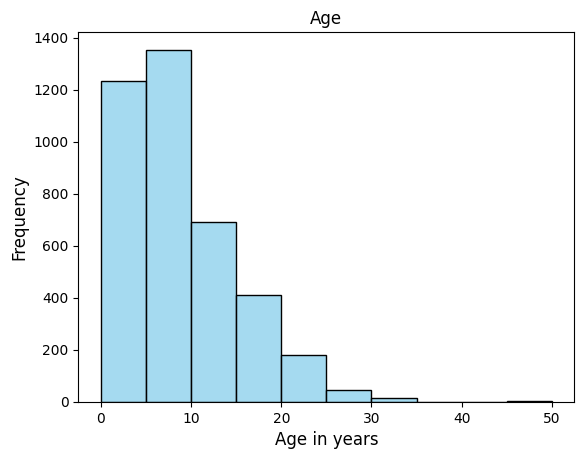

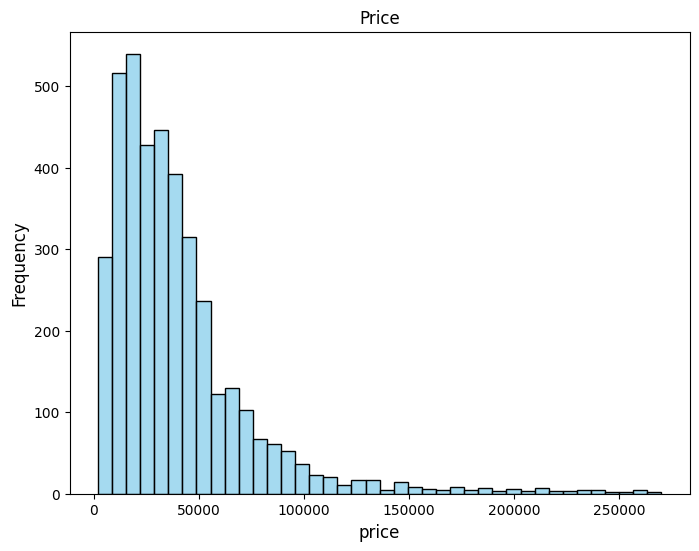

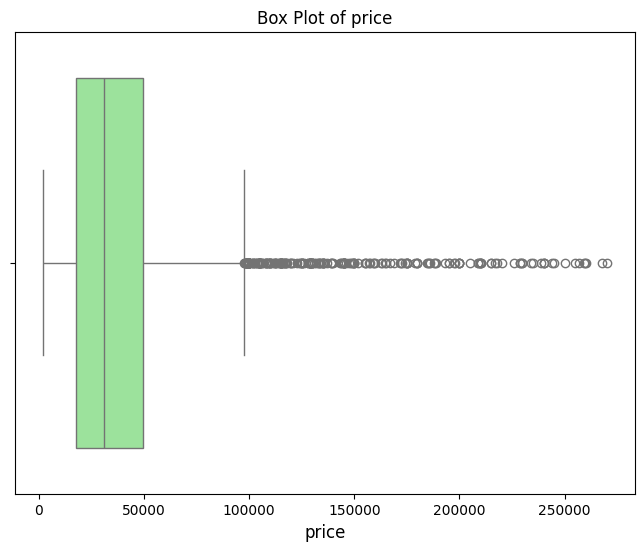

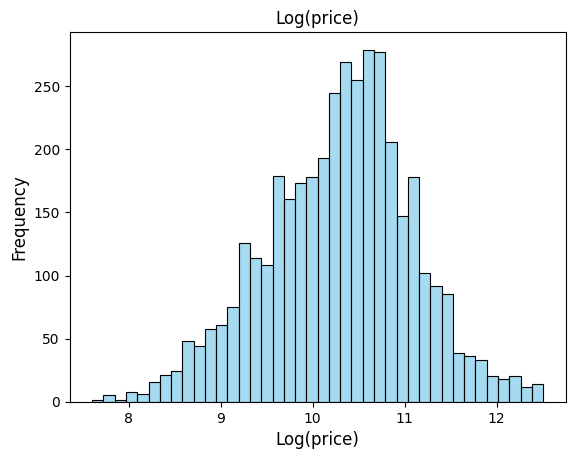

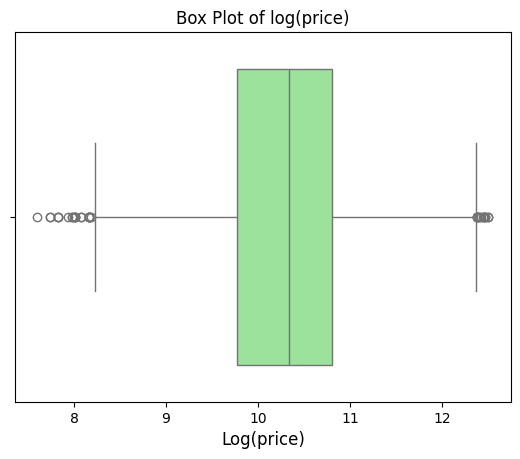


Data after encoding categorical variables and feature engineering:
   milage      price  age  engine_hp  brand_Alfa  brand_Aston  brand_Audi  \
0   51000   9.239996   11      300.0       False        False       False   
1   34742  10.545499    3      180.0       False        False       False   
2   22372  10.907771    2      180.0       False        False       False   
3   88900   9.648660    9      354.0       False        False       False   
4    9835  10.463103    3      180.0       False        False        True   

   brand_BMW  brand_Bentley  brand_Buick  ...  model_xB Base  \
0      False          False        False  ...          False   
1      False          False        False  ...          False   
2      False          False        False  ...          False   
3      False          False        False  ...          False   
4      False          False        False  ...          False   

   fuel_type_E85 Flex Fuel  fuel_type_Electric  fuel_type_Gasoline  \
0             

In [52]:
# Step 3: Data cleaning and Preprocessing

def clean_milage(df):
    # Clean the milage field
    df['milage'] = df['milage'].str.replace('"', '')      # Remove double quotes
    df['milage'] = df['milage'].str.replace(' mi.', '')   # Remove ' mi.' from the end
    df['milage'] = df['milage'].str.replace(',', '')      # Remove commas
    # Convert to numeric
    df['milage'] = pd.to_numeric(df['milage'], errors='coerce')
    # Replace any missing values with the median
    df['milage'] = df['milage'].fillna(df['milage'].median())
    return df

data = clean_milage(data)

# Check for missing values in milage
#missing_milage = data['milage'].isnull().sum()
#print()
#print(f"Number of missing milage values: {missing_milage}")

def clean_price(df):
    # Clean the price field
    df['price'] = df['price'].str.replace('"', '')  # Remove double quotes
    df['price'] = df['price'].str.replace('$', '')  # Remove dollar signs
    df['price'] = df['price'].str.replace(',', '')  # Remove commas
    # Convert to numeric
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    # Replace any missing values with the median
    df['price'] = df['price'].fillna(df['price'].median())
    return df

data = clean_price(data)

# Check for missing values in price
#missing_price = data['price'].isnull().sum()
#print()
#print(f"Number of missing price values: {missing_price}")

def create_age(df):
    # Create 'Age' feature
    # This is a more useful representation than using the model year
    current_year = 2024
    df['age'] = current_year - df['model_year']
    # drop the original model_year column
    df = df.drop('model_year', axis=1)
    return df

data = create_age(data)

# Handle missing values: fuel_type, accident, and clean_title

def clean_fuel_type(df):
    # Clean fuel_type
    # Replace 'not supported' with 'Hydrogen' (after inspection)
    df['fuel_type'] = df['fuel_type'].str.replace('not supported', 'Hydrogen')
    # Replace missing with 'Electric' (after inspection)
    df['fuel_type'] = df['fuel_type'].fillna('Electric')
    # Replace anything else with 'Gasoline'
    df['fuel_type'] = df['fuel_type'].str.replace(r'^[^a-zA-Z]', 'Gasoline', regex=True)
    return df

data = clean_fuel_type(data)

def clean_accident(df):
    # Clean accident
    # Replace missing with 'None reported'
    df['accident'] = df['accident'].fillna('None reported')
    return df

data = clean_accident(data)

def clean_engine(df):
    # Clean engine
    # Extract horsepower value as a string
    df['engine_hp_str'] = df['engine'].str.extract(r'(\d+\.?\d*)HP')
    # Convert the extracted horsepower strings to float
    df['engine_hp'] = pd.to_numeric(df['engine_hp_str'], errors='coerce')
    # Drop the intermediate string column and the original engine feature
    df = df.drop(columns=['engine_hp_str'])
    df = df.drop(columns=['engine'])
    # Replace missing values with the median sedan HP (web research)
    df['engine_hp'] = df['engine_hp'].fillna(180)
    return df

data = clean_engine(data)

# Check for missing values in engine_hp
#missing_hp = data['engine_hp'].isnull().sum()
#print()
#print(f"Number of missing horsepower values: {missing_hp}")

def clean_transmission(df):
    # Clean Transmission
    # Initialize the 'transmission_clean' column with 'Automatic'
    df['transmission_clean'] = 'Automatic'
    # Assign 'Automatic' where condition 1 is met
    df.loc[df['transmission'].str.contains(r'A/T|Automatic', case=False, na=False), 'transmission_clean'] = 'Automatic'
    # Assign 'Manual' where condition 2 is met
    df.loc[df['transmission'].str.contains(r'M/T|Manual', case=False, na=False), 'transmission_clean'] = 'Manual'
    # Drop the original transmission feature
    df = df.drop(columns=['transmission'])
    return df

data = clean_transmission(data)

def clean_title(df):
    # Clean title
    # Replace missing with 'No'
    df['clean_title'] = df['clean_title'].fillna('No')
    return df

data = clean_title(data)

# Check for missing values in transmission_clean
#missing_transmission = data['transmission_clean'].isnull().sum()
#print()
#print(f"Number of missing transmission values: {missing_transmission}")

print()
print("Statistical summary of numerical features:")
print(data.describe())

print("Value counts:")
print()
print(data['brand'].value_counts())
print()
print(data['fuel_type'].value_counts())
print()
print(data['accident'].value_counts())
print()
print(data['clean_title'].value_counts())

# IQR DID NOT IMPROVE THE MODEL SO COMMENTING OUT
# Scale the prices using IQR
# Calculate Q1, Q3, and IQR
#Q1 = data['price'].quantile(0.25)
#Q3 = data['price'].quantile(0.75)
#IQR = Q3 - Q1
# Normalize using the IQR method
#data['price'] = (data['price'] - Q1) / IQR

#print()
#print("Prices normalized with IQR")
#print(data['price'].head(10))

# Remove outliers from 'price' and 'milage'
# The model improved on mean absolute error and R-squared compared to
# leaving outliers in the dataset.
data = data[(data['price'] < data['price'].quantile(0.99)) &
            (data['milage'] < data['milage'].quantile(0.99))]

# Since interior color and exterior color have the lowest effect on price,
# drop them to simplify the model. This showed a very slight improvement
# in metrics.

def drop_colors(df):
    df = df.drop(columns=['int_col', 'ext_col'])
    return df

data = drop_colors(data)


# Visualizations

# Create a histogram of Age
sns.histplot(data['age'], bins=10, color='skyblue', edgecolor='black')
# Add titles and labels
plt.title('Age')
plt.xlabel('Age in years', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Histogram of price
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=40, color='skyblue', edgecolor='black')
plt.title('Price')
plt.xlabel('price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Configure x-axis to avoid scientific notation
#ax = plt.gca()
#ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
# Ensure the style is plain (non-scientific)
#ax.ticklabel_format(style='plain', axis='x')

# Boxplot of price
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['price'], color='lightgreen')
plt.title('Box Plot of price', fontsize=12)
plt.xlabel('price', fontsize=12)
plt.show()


def log_price(df):
    # Apply log transformation to 'price' to handle skewness
    df['price'] = np.log1p(df['price'])  # log(1 + price)
    return df

data = log_price(data)

# Print first 10 prices after transform
#print("\n")
#print(data['price'].head(10))

# Create a histogram of log(price)
sns.histplot(data['price'], bins=40, color='skyblue', edgecolor='black')
plt.title('Log(price)')
plt.xlabel('Log(price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Configure x-axis to avoid scientific notation
#ax = plt.gca()
#ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
# Ensure the style is plain (non-scientific)
#ax.ticklabel_format(style='plain', axis='x')

# Boxplot of log(price)
sns.boxplot(x=data['price'], color='lightgreen')
plt.title('Box Plot of log(price)', fontsize=12)
plt.xlabel('Log(price)', fontsize=12)
plt.show()

def one_hot_categeoricals(df):
    # Handle categorical variables with One-Hot Encoding
    #categorical_cols = ['brand', 'model', 'fuel_type', 'transmission_clean', 'ext_col', 'int_col', 'accident', 'clean_title']
    categorical_cols = ['brand', 'model', 'fuel_type', 'transmission_clean', 'accident', 'clean_title']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    return df

data = one_hot_categeoricals(data)

print("\nData after encoding categorical variables and feature engineering:")
print(data.head())



### Feature scaling and initial correlation analysis


In [35]:
# Feature Selection (target is price)
X = data.drop(['price'], axis=1)
y = data['price']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Linear Correlation Analysis
data_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled_price = data_scaled
data_scaled_price['Price'] = y

corr_matrix = data_scaled_price.corr()
print("\nCorrelation of features with Price:")
print(corr_matrix['Price'].sort_values(ascending=False))



Correlation of features with Price:
Price                         1.000000
model_e-tron Prestige         0.055394
model_Titan XD SV             0.054797
model_Avalanche 1500 LTZ      0.049576
model_CX-9 Touring Plus       0.043990
                                ...   
model_Tahoe RST                    NaN
model_V60 Cross Country T5         NaN
model_X3 M AWD                     NaN
model_XF 3.0 Portfolio             NaN
model_XJ8 Base                     NaN
Name: Price, Length: 1931, dtype: float64


### Build a machine learning model and make predictions

Fitting 5 folds for each of 27 candidates, totalling 135 fits

Model Performance on Entire Dataset:
Mean Absolute Error: 7602.032509840172
R-squared Score: 0.821394625089001

Top 10 Feature Importances:
                      Feature  Importance
3                   engine_hp    0.052622
45              brand_Porsche    0.035847
2               engine_hp_str    0.032498
0                      milage    0.028680
1                         age    0.027525
54                brand_Tesla    0.018646
8               brand_Bentley    0.017215
27          brand_Lamborghini    0.015899
1921  fuel_type_E85 Flex Fuel    0.014457
41               brand_Nissan    0.013445


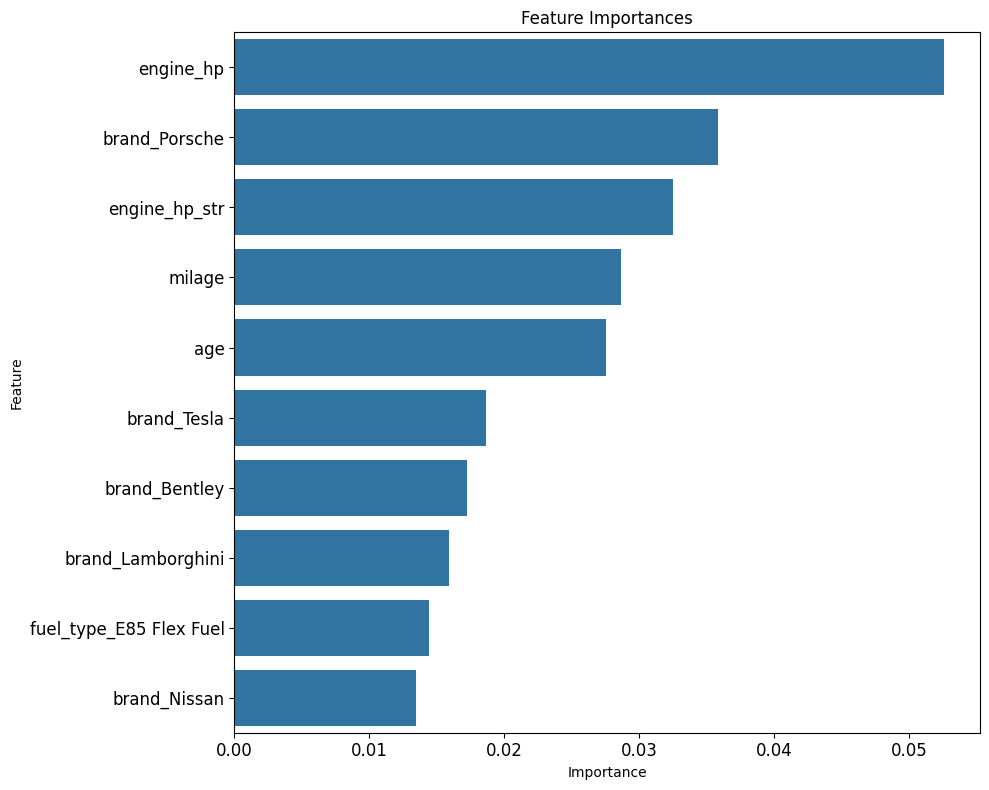

['trained_used_cars.pkl']

In [36]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Note: I started with a Random Forest Regressor, but found that XGBRegressor
# producted a better model. Finally, I added a grid search to improve
# the XGBRegressor hyperparameters

# Initialize the Random Forest Regressor
#rf = RandomForestRegressor(n_estimators=100, random_state=42)
# Perform 5-Fold Cross-Validation
#cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='r2')

# Set up hyperparameter grid
param_grid = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
# result:
# Mean Absolute Error: 7806.760567623847
# R² Score: 0.8084099330402091

#param_grid = {
#    'n_estimators': [50, 100, 200, 500],
#    'learning_rate': [0.05, 0.1, 0.2, 0.3],
#    'max_depth': [2, 5, 10],
#    'subsample': [0.8, 1.0],
#    'colsample_bytree': [0.6, 0.8, 1.0],
#    'alpha': [0, 1, 10]
#}
# Mean Absolute Error: 7582.5834600628195
# R-squared Score: 0.8220273889818761

# Initialize and perform grid search
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

#Try RandomForestRegressor
# Set up hyperparameter grid
#param_grid = {
#    'n_estimators': [100, 200, 300],  # Number of trees in the forest
#    'max_depth': [None, 10, 20, 30],  # Depth of trees; 'None' means grow until pure leaves
#    'max_features': ['auto', 'sqrt'],  # Number of features
#}

# Initialize and perform grid search
#grid_search = GridSearchCV(
#    estimator=RandomForestRegressor(random_state=42),
#    param_grid=param_grid,
#    scoring='r2',
#    cv=5,
#    n_jobs=-1,
#    verbose=1
#)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Reverse log transformation for predictions
y_pred = np.expm1(y_pred)  # exp(log(1 + y)) - 1
y_test = np.expm1(y_test)  # exp(log(1 + y)) - 1


# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance on Entire Dataset:")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)

print("\nTop 10 Feature Importances:")
print(feature_importances)

# Feature Importances Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Save the best trained model
joblib.dump(best_model, 'trained_used_cars.pkl')



### Make predictions with new data

In [53]:
# This record is a used Tacoma.
# Price is not included since it will be predicted
new_data = pd.DataFrame({
    'brand': ['Toyota'],
    'model': ['Tacoma'],
    'model_year': [2019],
    'milage': [86000],
    'fuel_type': ['Gasoline'],
    'engine': ['275HP'],
    'transmission': ['Automatic'],
    'ext_col': ['Blue'],
    'int_col': ['Gray'],
    'accident': ['None reported'],
    'clean_title': ['Yes']
})

# Clean and preprocess
#new_data = clean_milage(new_data)
#new_data = clean_price(new_data)
new_data = create_age(new_data)
new_data = clean_fuel_type(new_data)
new_data = clean_accident(new_data)
new_data = clean_engine(new_data)
new_data = clean_transmission(new_data)
new_data = clean_title(new_data)
new_data = drop_colors(new_data)
# new_data = log_price(new_data)
new_data = one_hot_categeoricals(new_data)


# Scale numerical features for the model
tacoma_data_scaled = scaler.transform(new_data)

# Use the new scaled data for the prediction
predicted_price = best_model.predict(tacoma_data_scaled)
# Reverse the log transform on price
predicted_price = np.expm1(predicted_price)
print(f"\nPredicted price for the Tacoma: ${predicted_price[0]:,.2f}")



ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- accident_None reported
- brand_Alfa
- brand_Aston
- brand_Audi
- brand_BMW
- ...
